In [10]:
import torch
import numpy as np

from torchvision import transforms as T
from tqdm import tqdm_notebook as tqdm

In [23]:
from constants import max_size, path_to_data, label_name_to_value
from dataset import FacadesDatasetRandomRot
from show import *

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [12]:
dset = FacadesDatasetRandomRot(
    img_dir='{}/images/rot_aug_{}'.format(path_to_data, max_size),
    caching=True,
    #init_caching=True,
)

In [101]:
img, lbl = dset[1]

(683, 1024, 3) (683, 1024, 1)


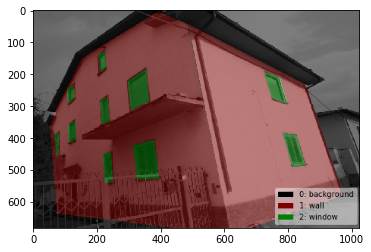

In [102]:
show_labeled_img(img, lbl)

In [103]:
lbl.unique()

tensor([2, 1, 0], dtype=torch.int32)

torch.Size([683, 1024, 1])


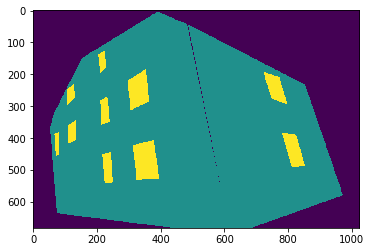

In [104]:
show_img(lbl)

In [105]:
label_name_to_value

{'background': 0, 'wall': 1, 'window': 2, 'door': 3}

In [106]:
lbl_masks = {l:T.ToPILImage()(lbl == l) for l in label_name_to_value.values()}

In [107]:
lbl_pil.getbbox()

(53, 45, 970, 638)

In [108]:
from scipy import ndimage
to_pil = T.ToPILImage()

In [109]:
def get_bounding_boxes(img, label_of_interest):
    bboxes = []
    labeled, nr_objects = ndimage.label(img == label_of_interest)
    for l in range(1, nr_objects+1):
        labeled_pil = to_pil(torch.tensor(labeled)  == l)
        bboxes.append(labeled_pil.getbbox())
    return bboxes

In [110]:
bboxes = get_bounding_boxes(lbl, label_of_interest=2)

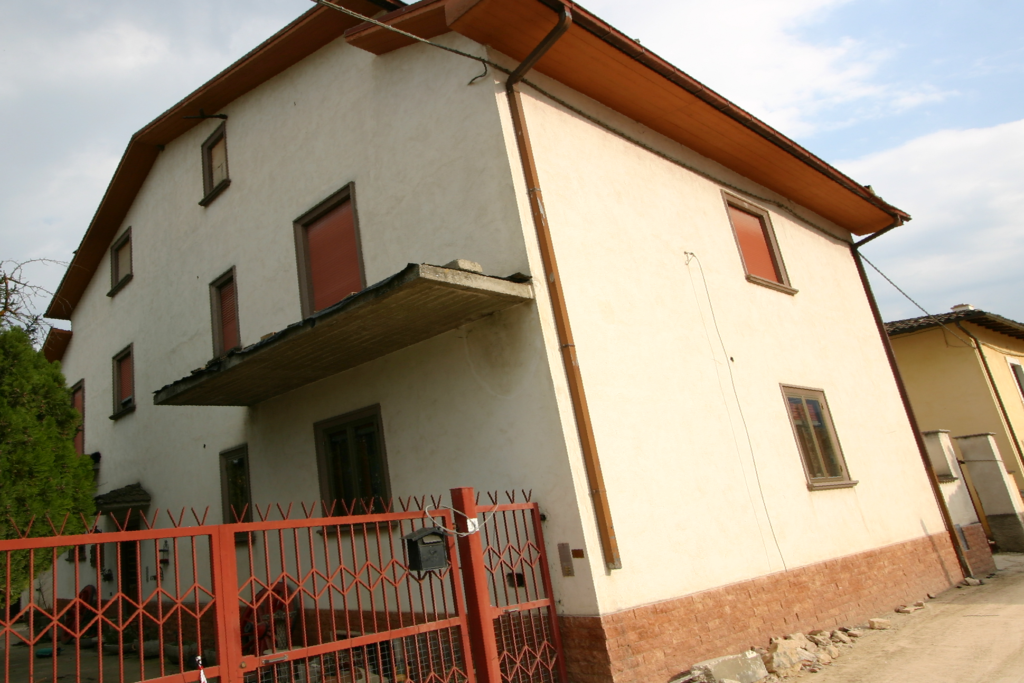

In [111]:
to_pil(img)

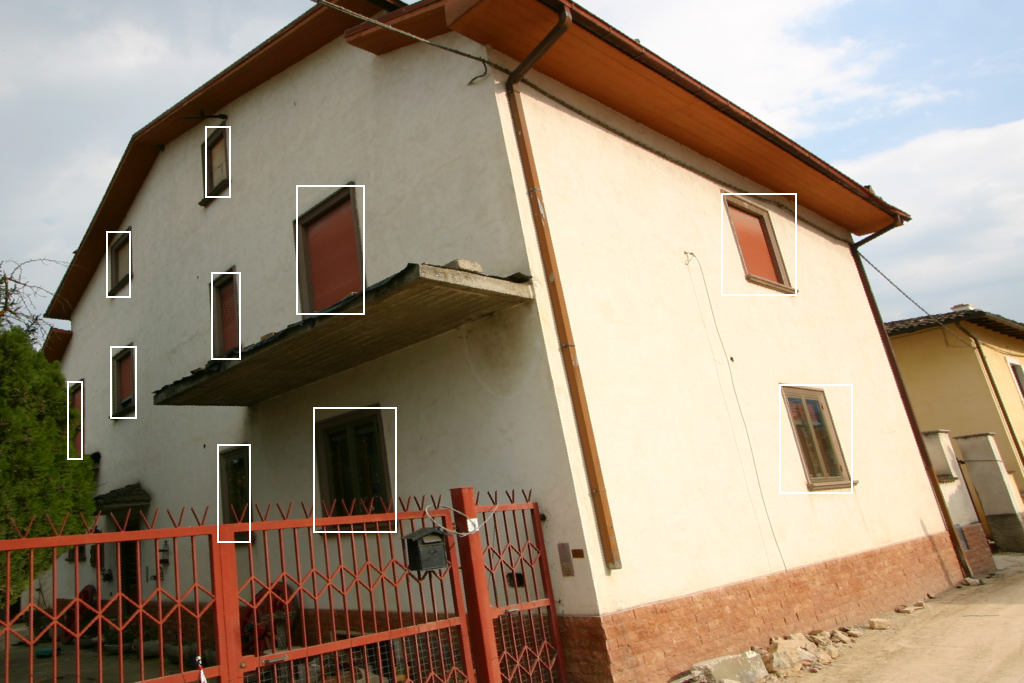

In [113]:
from PIL import ImageDraw
img_pil = to_pil(img)
draw = ImageDraw.Draw(img_pil)
for bbox in get_bounding_boxes(lbl, 2):
    draw.rectangle(bbox, width=2)
img_pil

In [93]:
'fdsaDFSAF'.lower()

'fdsadfsaf'